# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statistics import mode

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

In [4]:
print(df.shape)
print()
print(df.describe())
print()
print(df.info())
print()
df.head()

(1460, 81)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Handling NAN Values

The numerical variables require a varied strategy. If I posit that the NAN values are replacing 0's, I use that. If I determine that they represent missing data, I fill them with the intention of keeping the distribution the same. The **Lot Frontage** process is a good illustration of this strategy. 

The categorical variables such as **PoolQC** and **MiscFeature** refer to what kind of extra ammenity is located on the property. I posit that the NAN values denote when a property doesn't have one of those ammenities. Therefore, I am replacing that value with a string that identifies the lack of amenity. The price of the property could be dependent on that amenity not being there. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


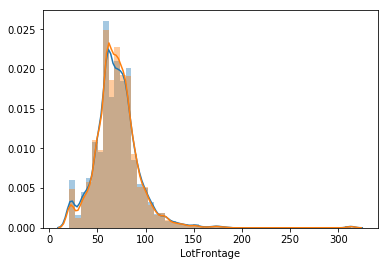

In [5]:
# The interpolate() method keeps the data in much of the same distribution. 

sns.distplot(df['LotFrontage'].dropna())
sns.distplot(df['LotFrontage'].interpolate())

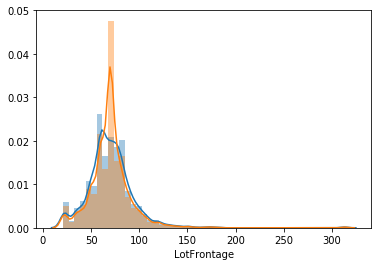

In [6]:
# Filling NA with the mean does not. 

sns.distplot(df['LotFrontage'].dropna())
sns.distplot(df['LotFrontage'].fillna(df['LotFrontage'].mean()))

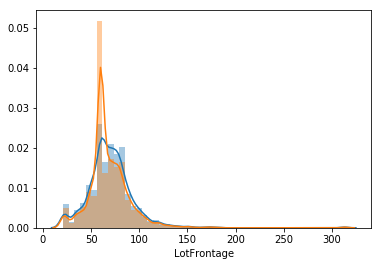

In [7]:
# Similarly the mode does not keep the distribution the same. 

sns.distplot(df['LotFrontage'].dropna())
sns.distplot(df['LotFrontage'].fillna(mode(df['LotFrontage'])))

In [8]:
# Replace NAN in Numerical Variables
df['LotFrontage'] = df['LotFrontage'].interpolate()

# Replace NAN in Categorical Variables. 
df = df.fillna('Na')

print(df.shape)
print()
print(df.isnull().sum())

(1460, 81)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0


### Categorical Encoding

Now that the NAN values are dealt with, I need to turn the categorical variables into numbers. That way I can use them in my regression. 

In [9]:
# Find all columns where values are variables. 
ob_columns = df.select_dtypes(include='object').columns.tolist()
# Change those columns to categories, then use .cat.codes to encode them to int8
for col in ob_columns:     # 
    df[col+'Cat'] = df[col].astype('category').cat.codes
    
# Create a new Dataframe with only numbers to feed a model
num_df = df.select_dtypes(include = 'number')

# A look at the data

print(num_df.shape)
print()
print(num_df.info())
print()
num_df.head()

(1460, 81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id                  1460 non-null int64
MSSubClass          1460 non-null int64
LotFrontage         1460 non-null float64
LotArea             1460 non-null int64
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
YearBuilt           1460 non-null int64
YearRemodAdd        1460 non-null int64
BsmtFinSF1          1460 non-null int64
BsmtFinSF2          1460 non-null int64
BsmtUnfSF           1460 non-null int64
TotalBsmtSF         1460 non-null int64
1stFlrSF            1460 non-null int64
2ndFlrSF            1460 non-null int64
LowQualFinSF        1460 non-null int64
GrLivArea           1460 non-null int64
BsmtFullBath        1460 non-null int64
BsmtHalfBath        1460 non-null int64
FullBath            1460 non-null int64
HalfBath            1460 non-null int64
BedroomAbvGr        1460 non-null int64
KitchenAbvGr        1460 non-null int64

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoningCat,StreetCat,AlleyCat,LotShapeCat,LandContourCat,UtilitiesCat,LotConfigCat,LandSlopeCat,NeighborhoodCat,Condition1Cat,Condition2Cat,BldgTypeCat,HouseStyleCat,RoofStyleCat,RoofMatlCat,Exterior1stCat,Exterior2ndCat,MasVnrTypeCat,MasVnrAreaCat,ExterQualCat,ExterCondCat,FoundationCat,BsmtQualCat,BsmtCondCat,BsmtExposureCat,BsmtFinType1Cat,BsmtFinType2Cat,HeatingCat,HeatingQCCat,CentralAirCat,ElectricalCat,KitchenQualCat,FunctionalCat,FireplaceQuCat,GarageTypeCat,GarageYrBltCat,GarageFinishCat,GarageQualCat,GarageCondCat,PavedDriveCat,PoolQCCat,FenceCat,MiscFeatureCat,SaleTypeCat,SaleConditionCat
0,1,60,65.0,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,128,2,4,2,2,4,4,2,6,1,0,1,5,2,6,3,1,89,2,5,5,2,3,4,1,8,4
1,2,20,80.0,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,0,3,4,1,2,4,1,0,6,1,0,1,5,3,6,5,1,62,2,5,5,2,3,4,1,8,4
2,3,60,68.0,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,104,2,4,2,2,4,2,2,6,1,0,1,5,2,6,5,1,87,2,5,5,2,3,4,1,8,4
3,4,70,60.0,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,0,3,4,0,4,1,4,0,6,1,2,1,5,2,6,2,5,84,3,5,5,2,3,4,1,8,0
4,5,60,84.0,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,221,2,4,2,2,4,0,2,6,1,0,1,5,2,6,5,1,86,2,5,5,2,3,4,1,8,4


In [10]:
#sns.pairplot(num_df, size = 24,24)

### Modeling

In [11]:
#Target stays the same, features will be changed frequently. 
columns = num_df.drop(columns = ['SalePrice']).columns.tolist()
features = columns
target = ['SalePrice']

#Naming Global values for X and Y. 
X = num_df[features]
y = num_df[target]


/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


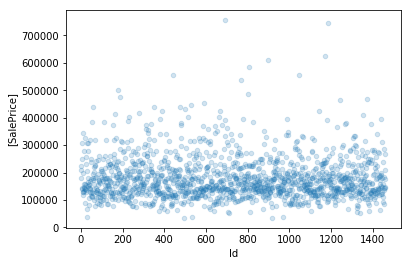

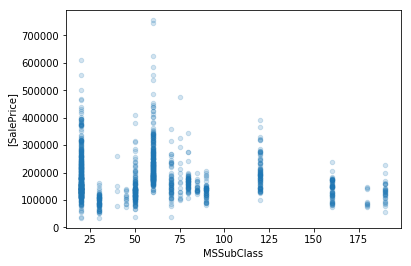

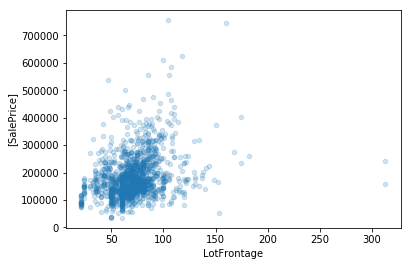

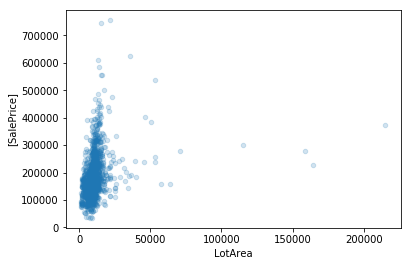

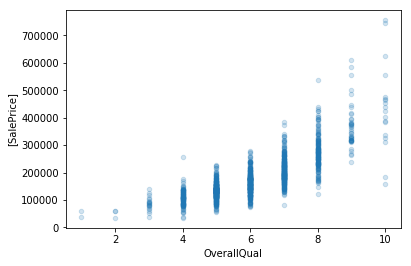

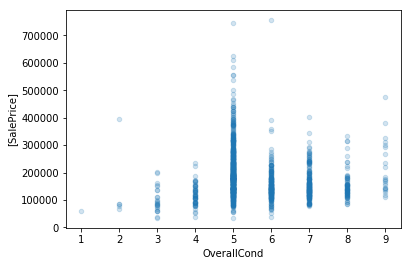

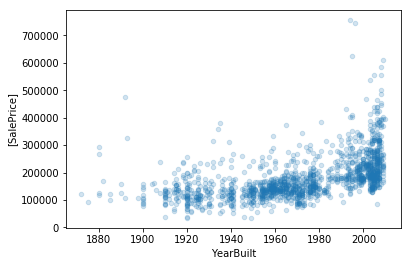

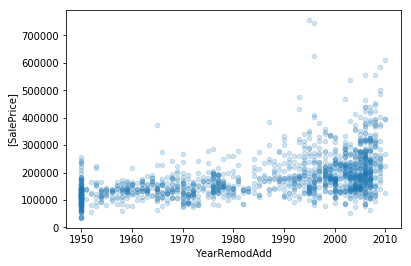

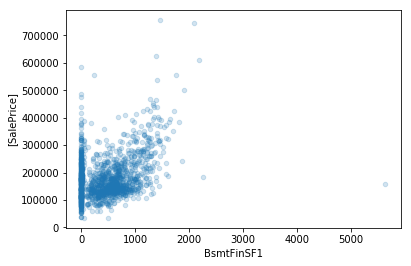

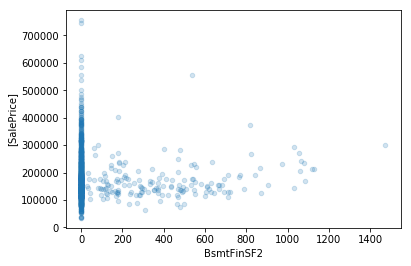

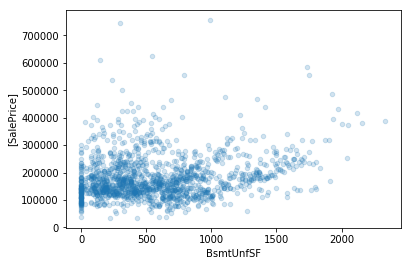

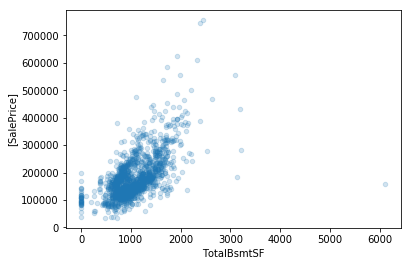

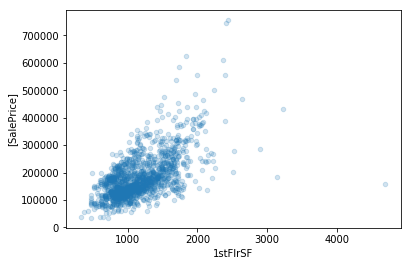

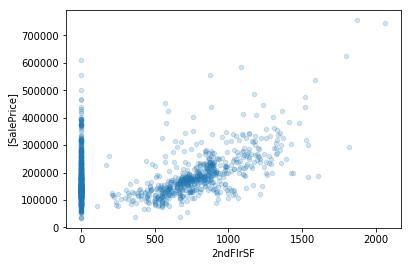

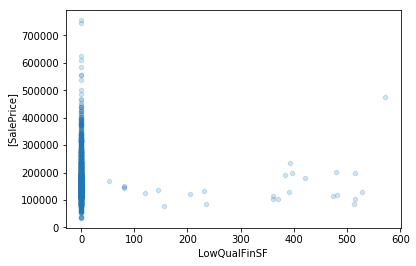

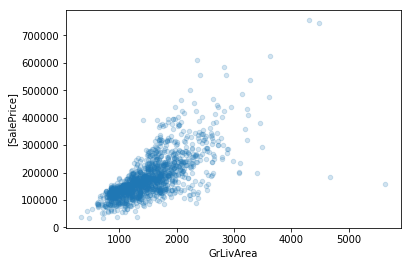

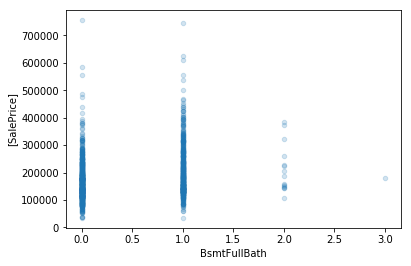

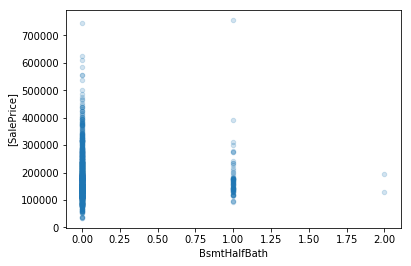

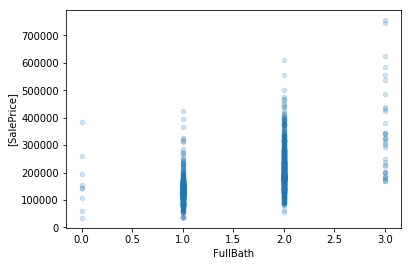

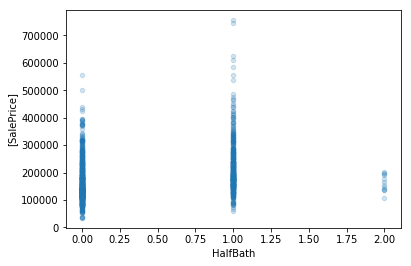

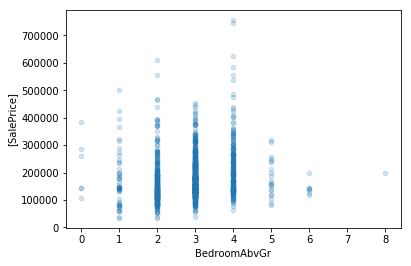

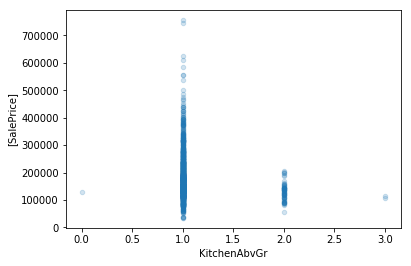

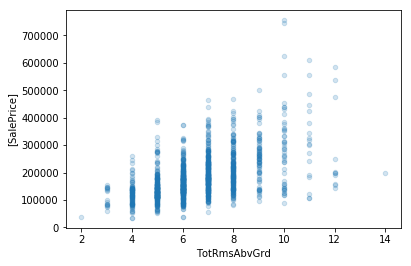

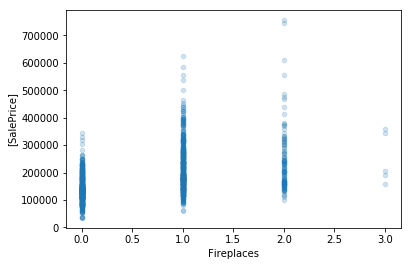

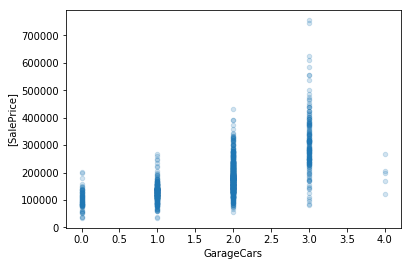

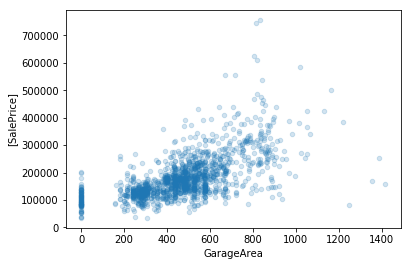

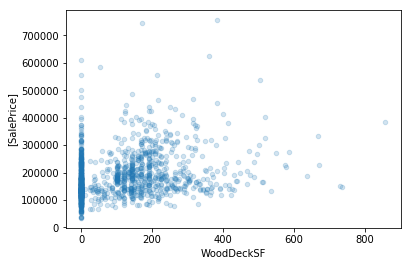

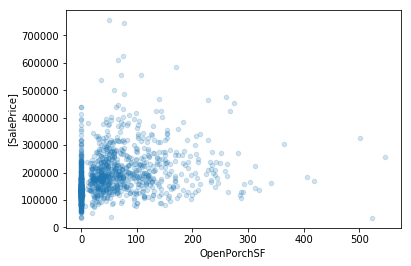

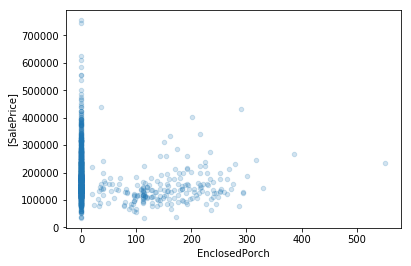

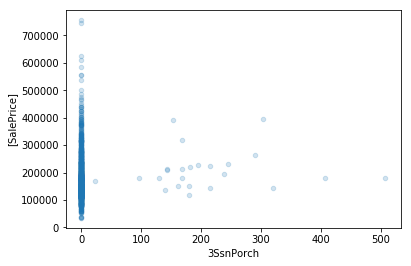

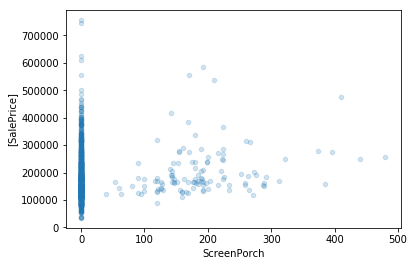

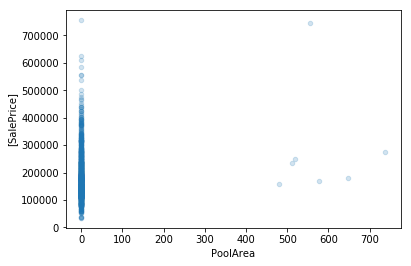

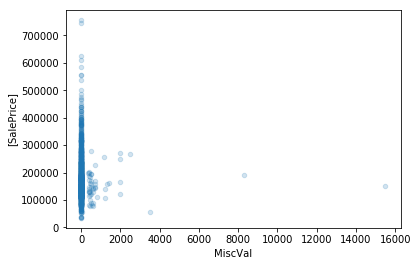

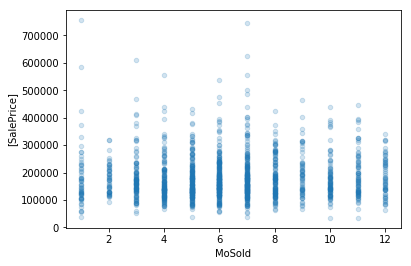

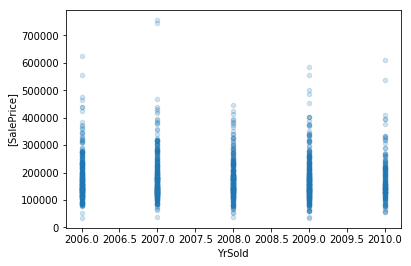

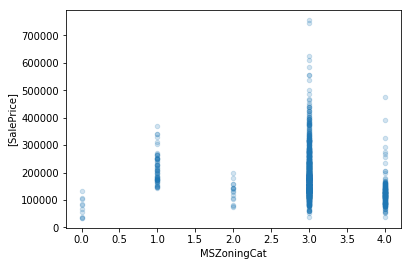

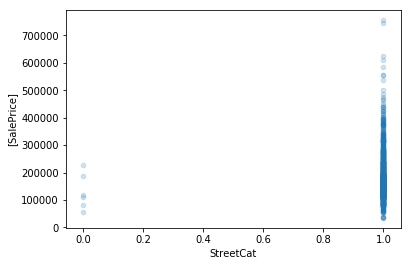

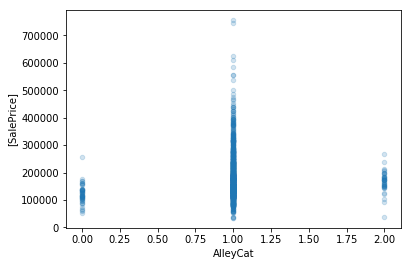

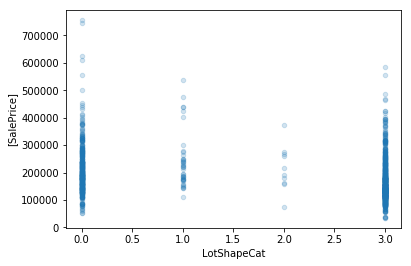

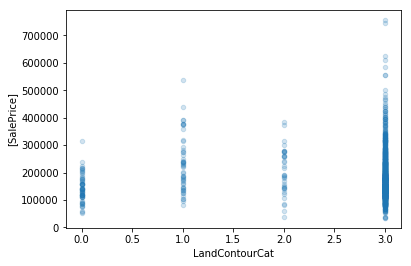

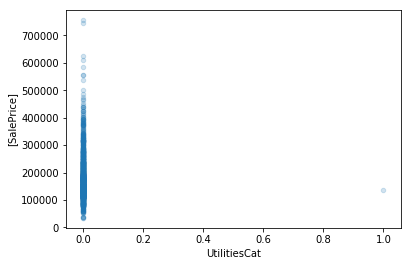

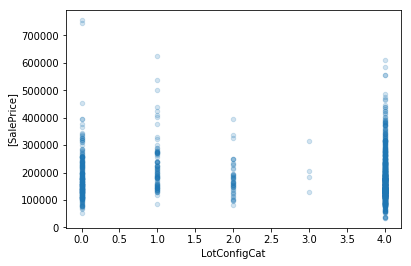

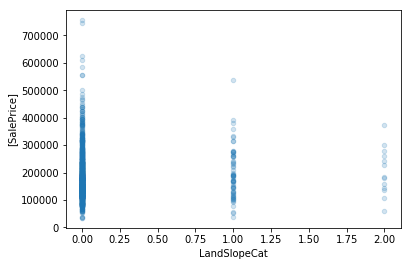

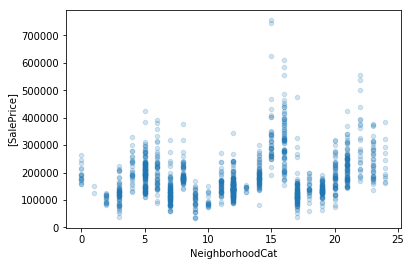

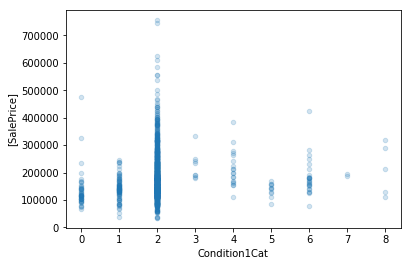

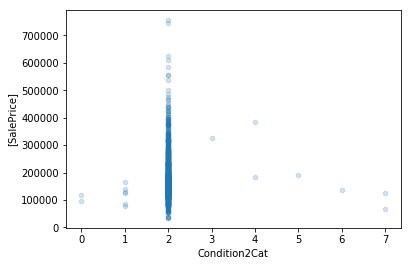

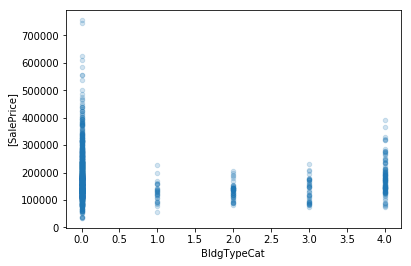

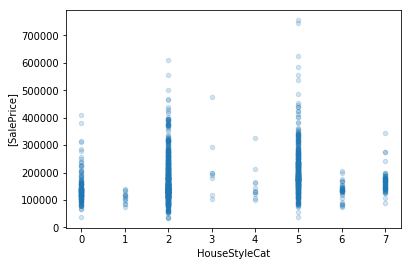

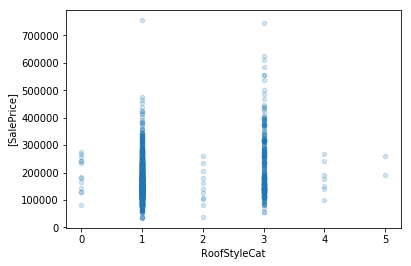

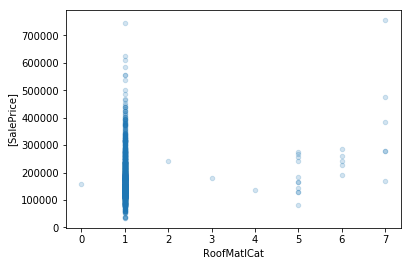

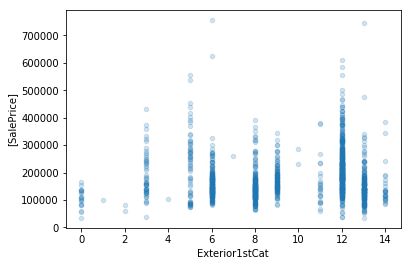

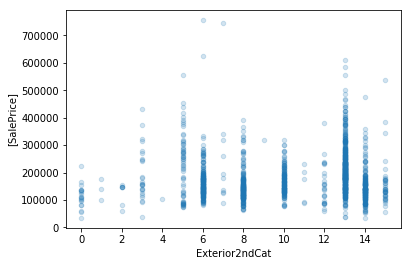

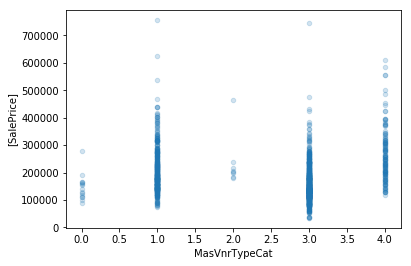

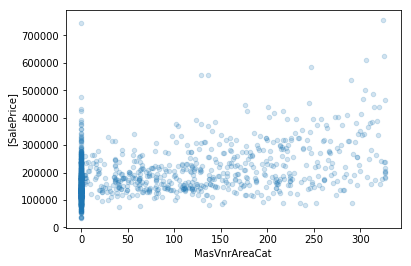

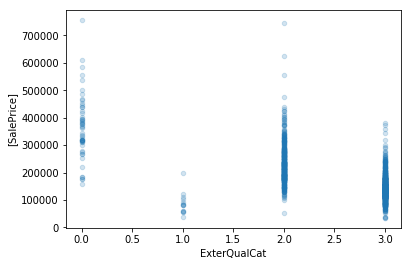

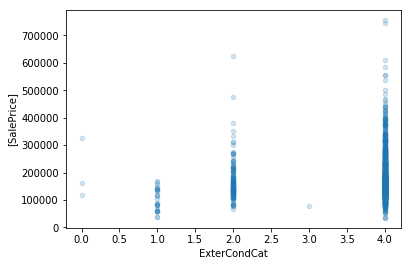

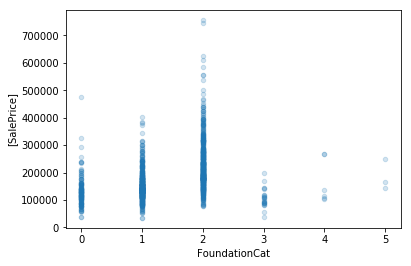

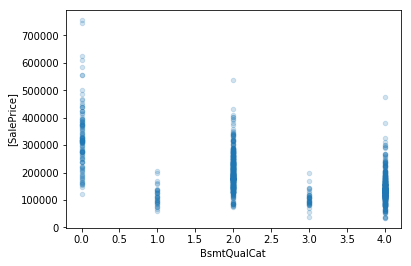

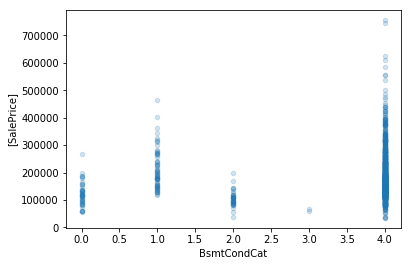

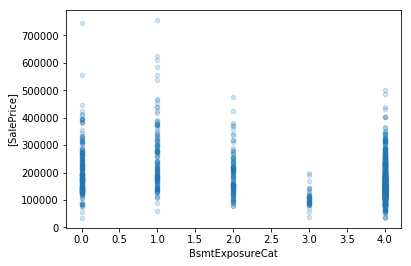

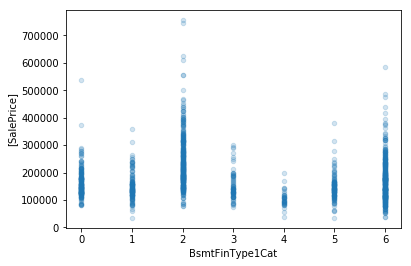

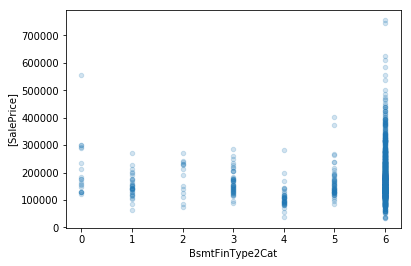

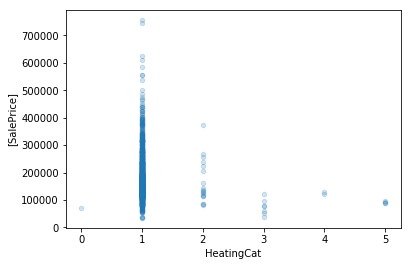

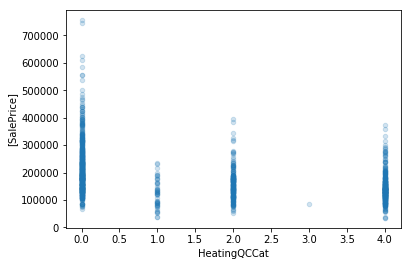

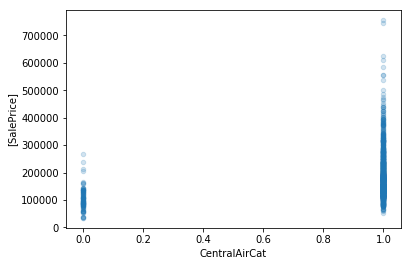

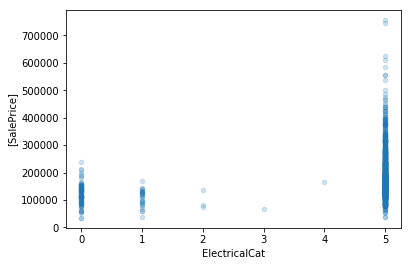

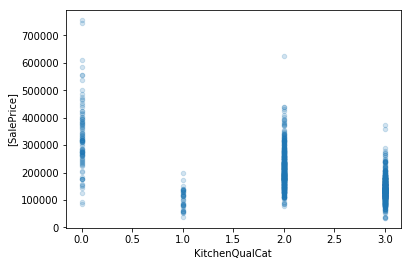

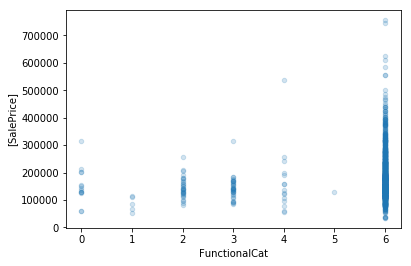

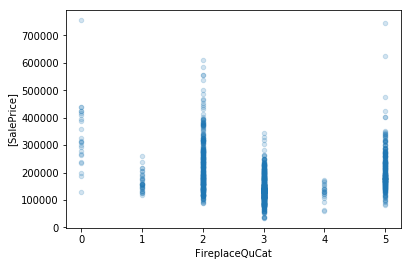

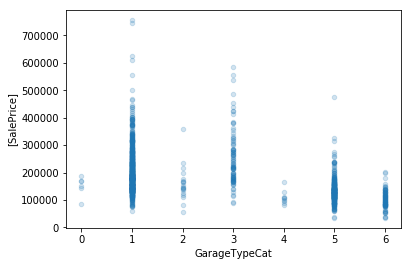

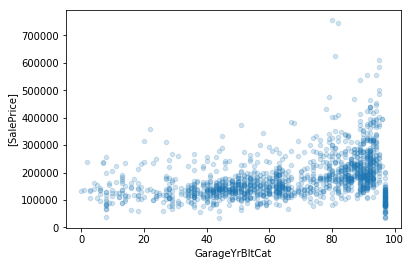

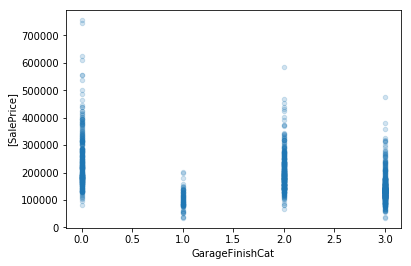

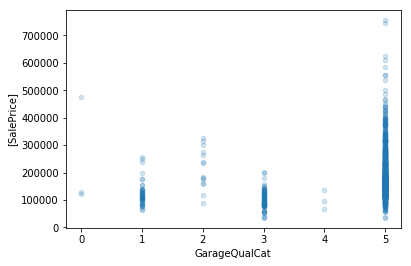

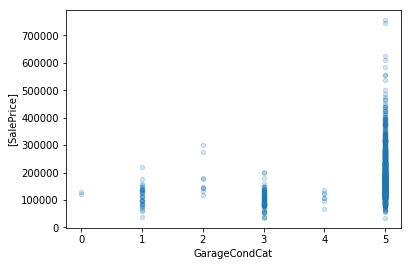

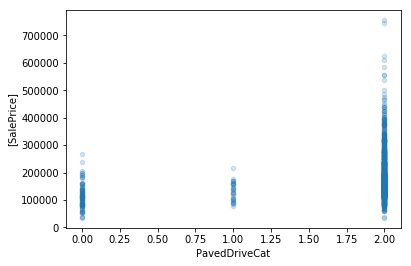

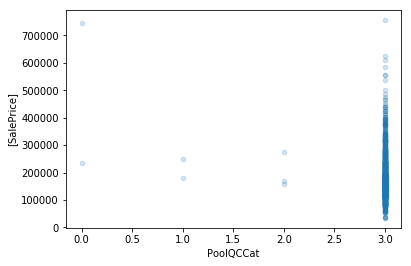

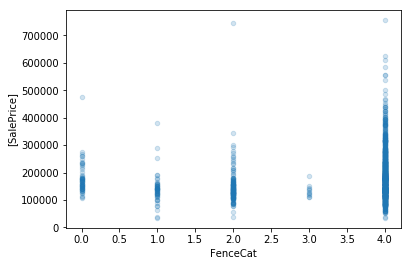

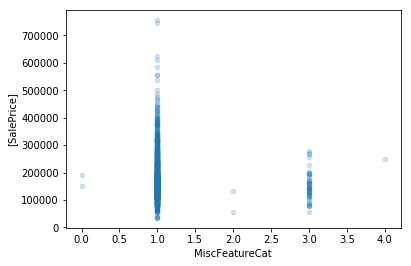

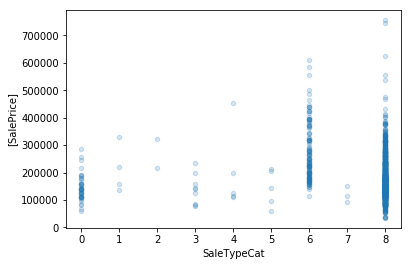

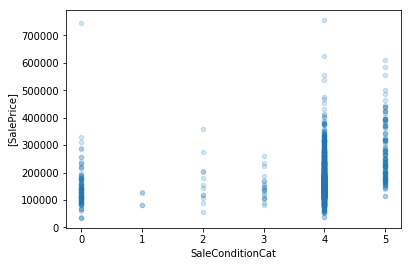

In [12]:
# A look at the features. 
for feature in features:
        num_df.plot.scatter(feature,target, alpha =0.2)

#### I'm going to Kitchen Sink it!

In [19]:
def lin_mod( X , y ):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        train_size = 0.8,
                                                        test_size= 0.2, 
                                                        random_state=42)
    #Call and fit model
    model = LinearRegression().fit(X_train, y_train)
    
    #Model Prediction
    y_pred = model.predict(X_test)
    
    #Error Variables
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)
    
    #Return these values in case I want to plot them. 
    #intercept = model.intercept_
    #coeff = pd.Series(model.coef_, X_train.columns)
    #coeff = model.coef_
    #These are the error metrics I care about
    print('Root Mean Squared Error', rmse)
    print('R^2 Score', r2)
    #print('Intercept', model.intercept_)
    #coefficients = pd.Series(model.coef_, X_train.columns)
    print('Coeff: ', model.coef_)

In [20]:
lin_mod(X,y)

Root Mean Squared Error 41775.76903935039
R^2 Score 0.7724718829827768
Coeff:  [[   49.62472262 26962.12716485    45.02162771    70.67595885]]


Well, thats a good benchmark. 

What if I cherry pick some of the linear looking features.   


#### Linear Bivariate!

In [21]:
features = ['MasVnrAreaCat']
X = num_df[features]

lin_mod(X,y)

Root Mean Squared Error 74073.16338134561
R^2 Score 0.2846675115097014
Coeff:  [[366.51147143]]


In [41]:
features = ['NeighborhoodCat']
X = num_df[features]

lin_mod(X,y)

Root Mean Squared Error 85206.18440848068
R^2 Score 0.05348303770323637
Coeff:  [[2621.70286526]]


In [22]:
features = ['OverallQual']
X = num_df[features]

lin_mod(X,y)

Root Mean Squared Error 51778.62651238531
R^2 Score 0.6504677778896862
Coeff:  [[44379.87767098]]


In [23]:
features = ['GrLivArea']
X = num_df[features]

lin_mod(X,y)

Root Mean Squared Error 58471.75652552955
R^2 Score 0.5542632452871117
Coeff:  [[102.48895892]]


In [24]:
features = ['GarageArea']
X = num_df[features]

lin_mod(X,y)

Root Mean Squared Error 68673.90532347778
R^2 Score 0.385149321555714
Coeff:  [[228.44274774]]


#### Trying Multivariate

In [25]:
# All together now!
features = ['MasVnrAreaCat','OverallQual','GrLivArea','GarageArea']
X = num_df[features]

lin_mod(X,y)

Root Mean Squared Error 41775.76903935039
R^2 Score 0.7724718829827768
Coeff:  [[   49.62472262 26962.12716485    45.02162771    70.67595885]]


Diving into the data, I'm going to pull the features appear to have a clear regression. 

In [42]:
#Drop BedroomAbvGr, 2ndFlrSF, WoodDeckSF,ExterCondCat
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
            '1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath',
            'BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
            'GarageArea','WoodDeckSF','OpenPorchSF','NeighborhoodCat',
            'MasVnrAreaCat','ExterCondCat','BsmtFinType2Cat','CentralAirCat',
            'FunctionalCat','GarageTypeCat']

X = num_df[features]

lin_mod(X,y)

Root Mean Squared Error 37248.70920261756
R^2 Score 0.8191124732138374
Coeff:  [[-4.01233307e+01  4.70224010e-01  1.78217307e+04  4.55907035e+03
   3.68920470e+02  1.99426592e+02  1.05651345e+01  2.31375506e+00
   5.64624266e+00  1.73082070e+01  7.97428231e+00  3.21347232e+01
   8.79038054e+03 -9.59789962e+02 -6.85049649e+03  4.22697585e+03
   7.28542868e+03  1.15644546e+04  4.73139239e+00  2.40537894e+01
  -4.28621872e+00  4.38937633e+02  2.27790894e+01 -7.90678635e+02
  -2.13686099e+02 -3.40699249e+03  3.36053898e+03  9.21927197e+02]]


In [43]:
#Post Drop
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
            '1stFlrSF','GrLivArea','BsmtFullBath','FullBath',
            'TotRmsAbvGrd','Fireplaces','GarageCars',
            'GarageArea','OpenPorchSF','NeighborhoodCat',
            'MasVnrAreaCat','BsmtFinType2Cat','CentralAirCat',
            'FunctionalCat','GarageTypeCat']

X = num_df[features]

lin_mod(X,y)

Root Mean Squared Error 38063.5562622289
R^2 Score 0.8111117733206312
Coeff:  [[-7.42876933e+01  4.91363524e-01  1.85826488e+04  4.50258582e+03
   3.69198526e+02  2.56778940e+02  1.06343966e+01  1.04841773e+00
   5.52500617e+00  1.23180604e+01  3.95941501e+01  9.12647423e+03
  -2.15922961e+03  1.86219070e+03  8.07930694e+03  1.18397989e+04
   7.31145193e+00 -5.43242084e+00  4.18038259e+02  2.11773350e+01
  -2.57849372e+02 -5.20576793e+03  3.17548221e+03  8.23434510e+02]]


Slight Improvements over the kitchen sink!

Now to try some polynomial features!

In [45]:
num_df['LotFrontage_2'] = num_df['LotFrontage']**2
num_df['LotArea_2'] = num_df['LotArea']**2
num_df['YearRemodAdd_2'] = num_df['YearRemodAdd']**2
num_df['BsmtFinSF1_2'] = num_df['BsmtFinSF1']**2
num_df['BsmtUnfSF_2'] = num_df['BsmtUnfSF']**2
num_df['TotalBsmtSF_2'] = num_df['TotalBsmtSF']**2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [46]:
#Drop didn't help. Returning Dropped Features
#Adding polynomials
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
            '1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath',
            'BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
            'GarageArea','WoodDeckSF','OpenPorchSF','NeighborhoodCat',
            'MasVnrAreaCat','ExterCondCat','BsmtFinType2Cat','CentralAirCat',
            'FunctionalCat','GarageTypeCat','LotFrontage_2','LotArea_2',
            'YearRemodAdd_2','BsmtFinSF1_2','BsmtUnfSF_2','TotalBsmtSF_2']

X = num_df[features]

lin_mod(X,y)

Root Mean Squared Error 34983.133019181245
R^2 Score 0.8404475164705505
Coeff:  [[ 3.03948420e+02  1.22017420e+00  1.55139103e+04  4.24236121e+03
   4.08513454e+02 -1.05663126e+05  4.88193799e+01 -1.24200594e+01
   2.19193841e+01  2.40672661e+01  2.32422462e+01  3.32760321e+01
   1.39713087e+03 -2.92878538e+03 -9.26790914e+03  3.16905466e+03
   6.49915163e+03  2.92451033e+03  1.81116778e+01  2.13783325e+01
  -1.05323916e+01  3.28837923e+02  1.40119505e+01 -4.46422099e+02
  -8.15634881e+02 -1.47344694e+03  3.79875494e+03  1.71833591e+03
  -1.25857195e+00 -4.34146820e-06  2.67546067e+01 -2.14633896e-02
   9.02415228e-03 -8.30504268e-04]]


#### Adding Interaction Terms

In [ ]:
#To be continued...

### Time to go logging!

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


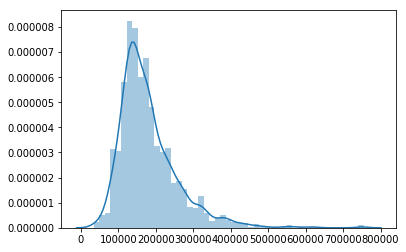

In [47]:
sns.distplot(df[target])

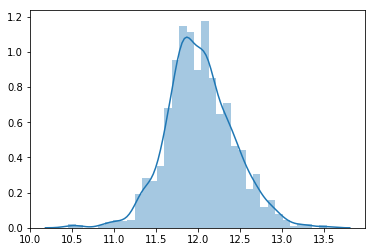

In [48]:
sns.distplot(np.log(df[target]))

In [49]:
num_df['log_price'] = np.log(num_df['SalePrice'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


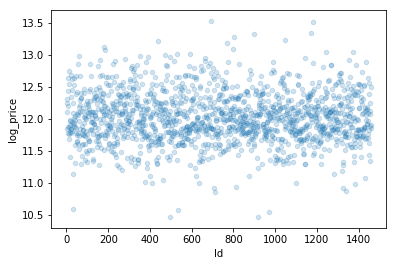

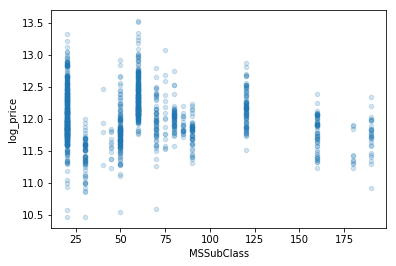

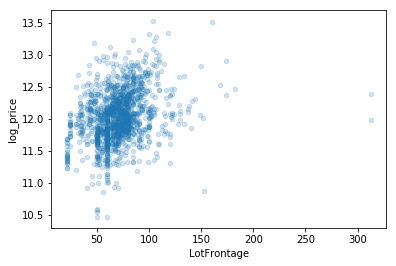

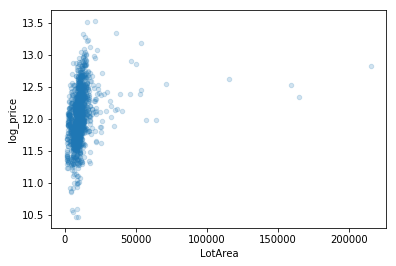

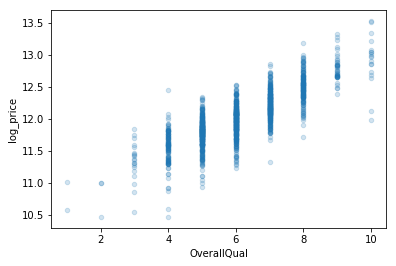

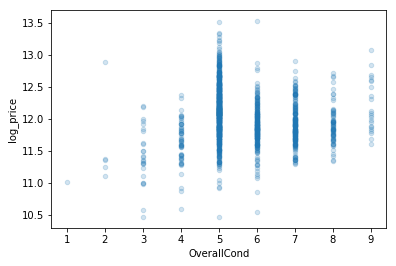

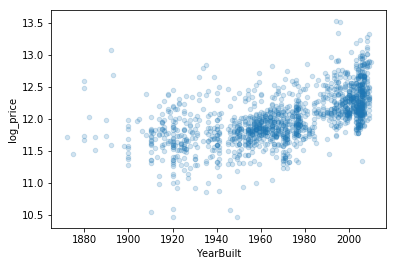

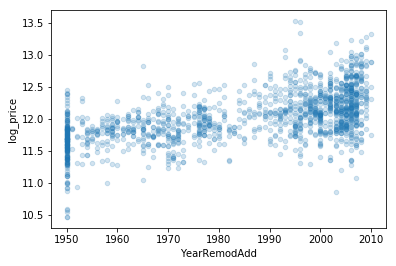

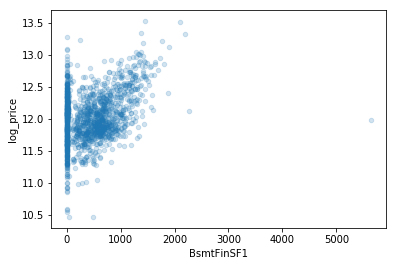

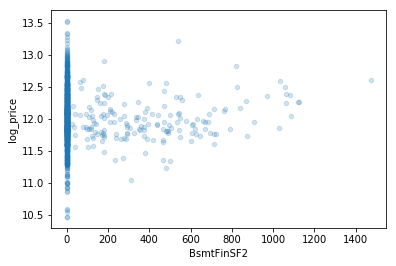

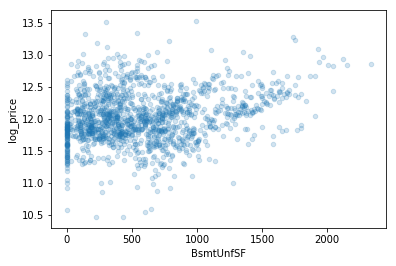

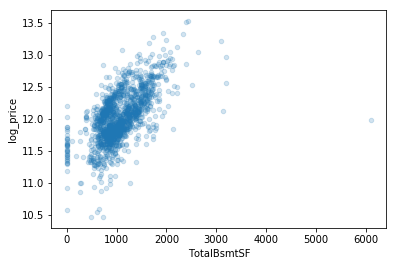

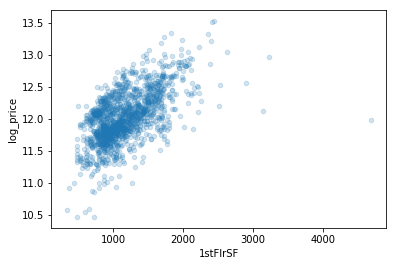

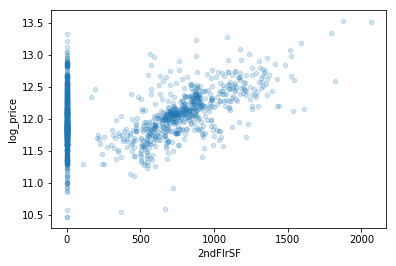

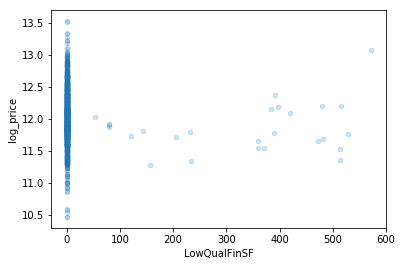

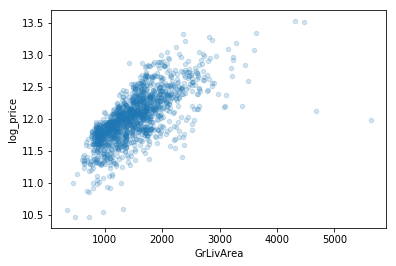

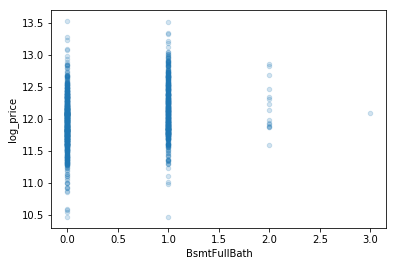

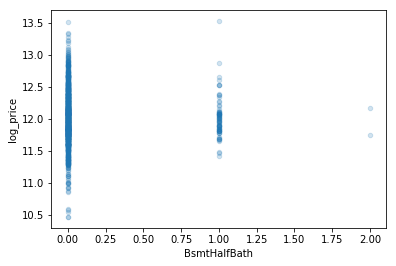

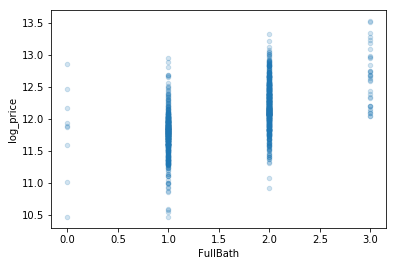

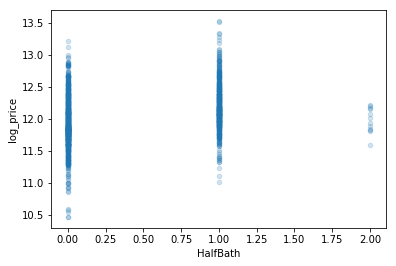

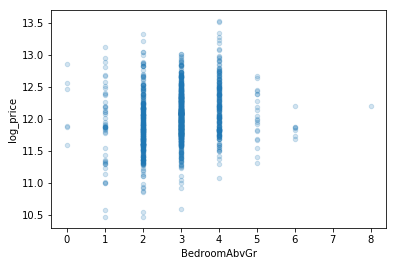

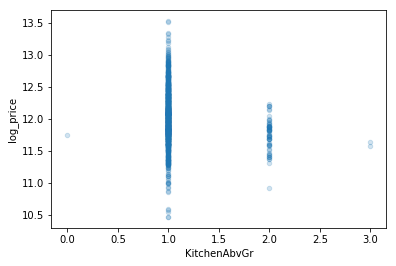

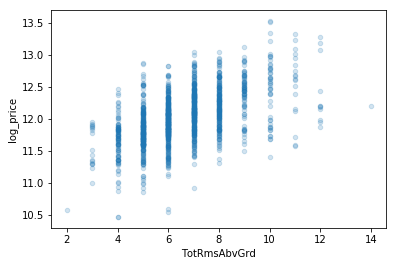

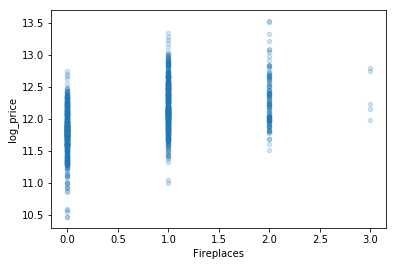

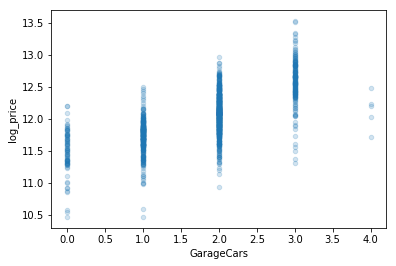

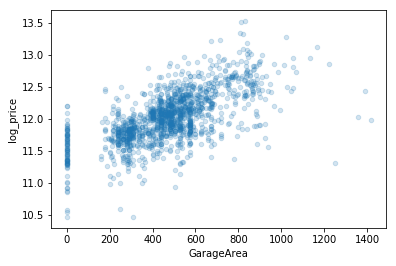

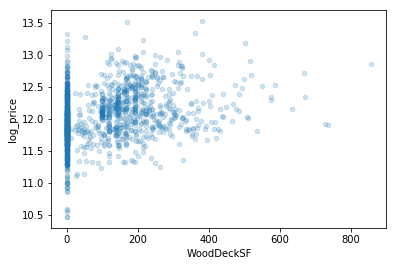

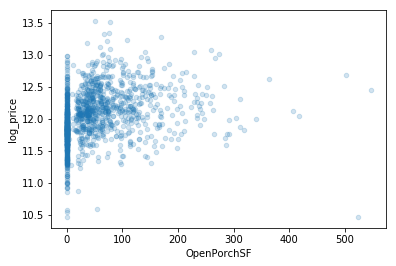

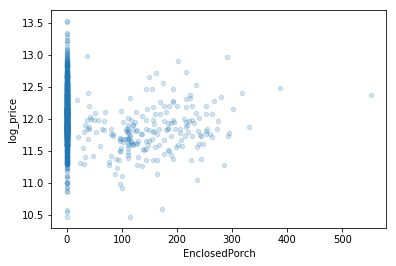

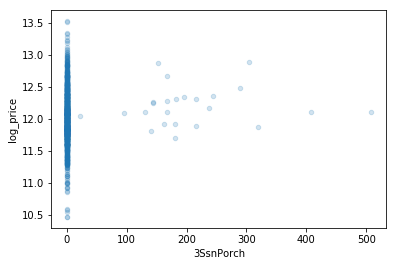

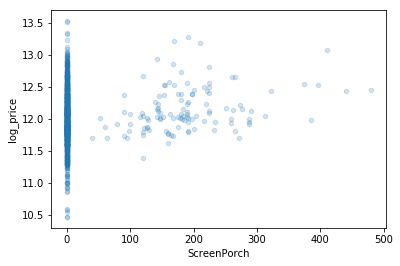

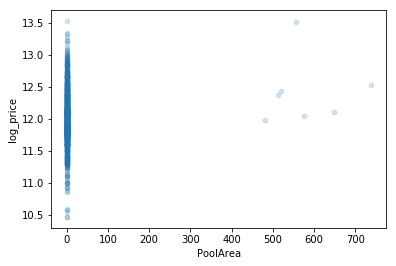

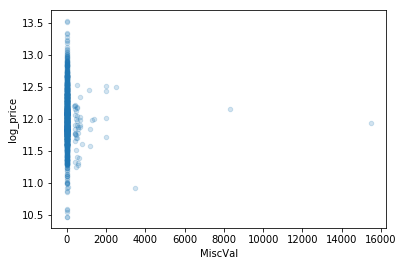

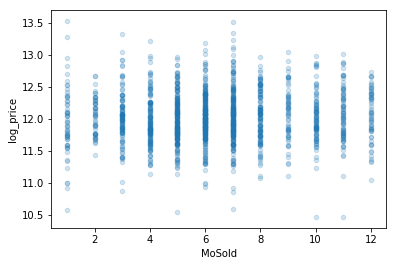

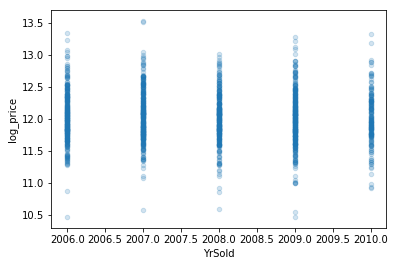

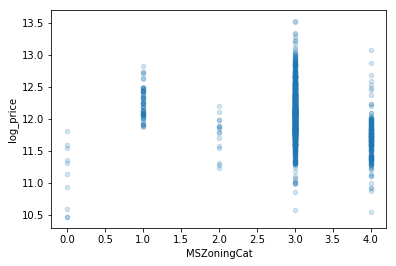

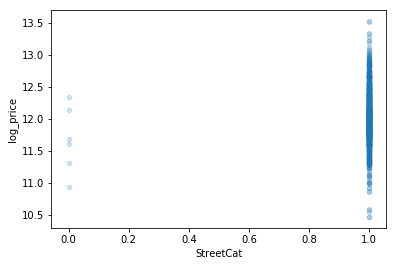

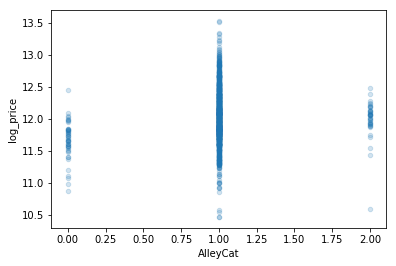

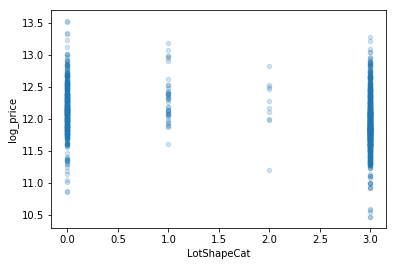

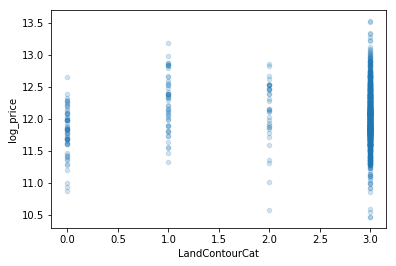

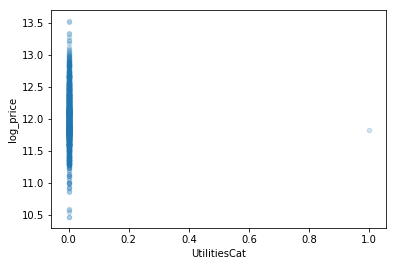

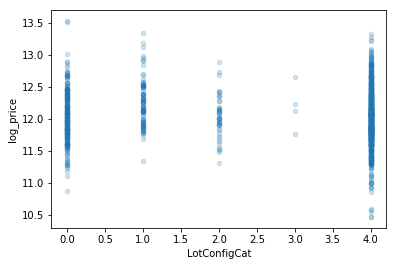

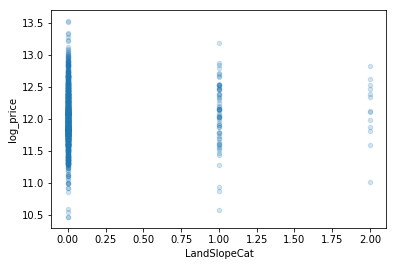

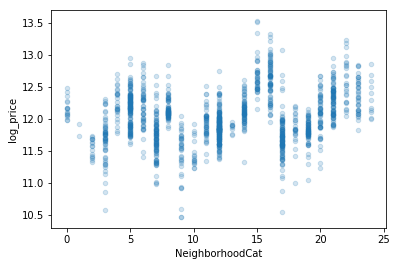

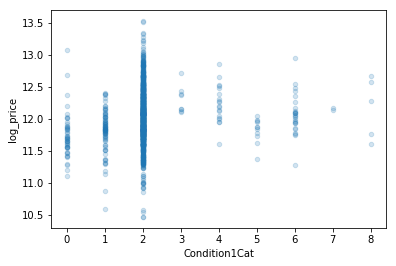

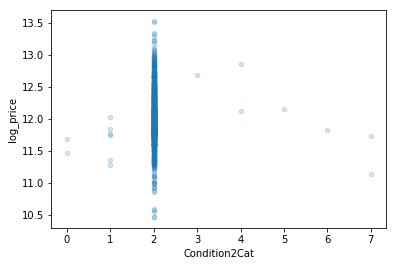

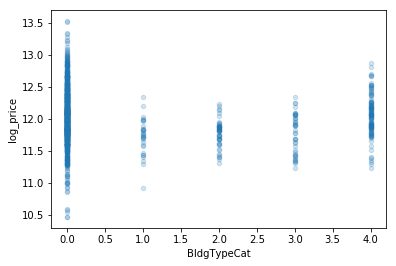

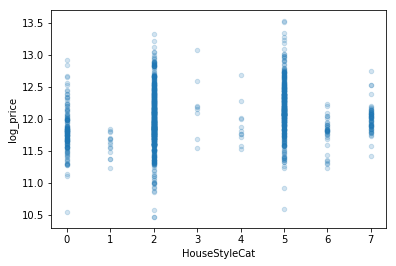

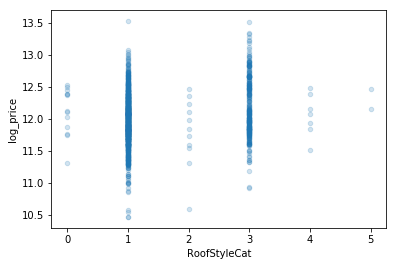

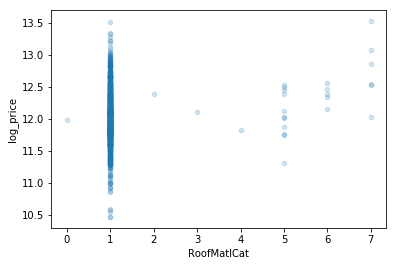

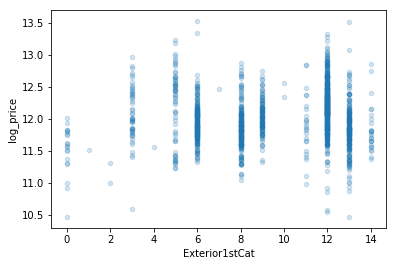

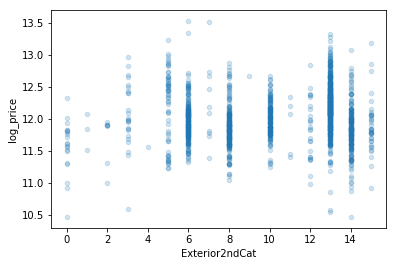

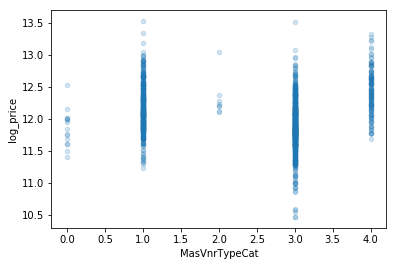

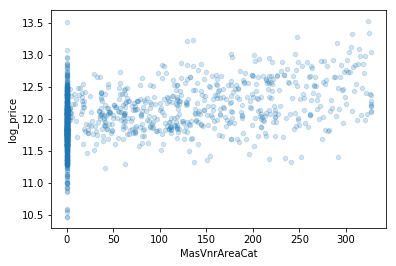

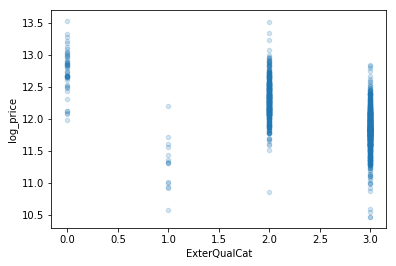

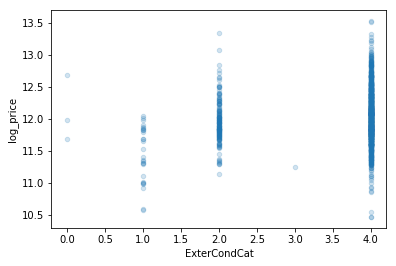

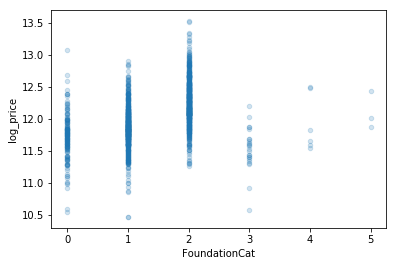

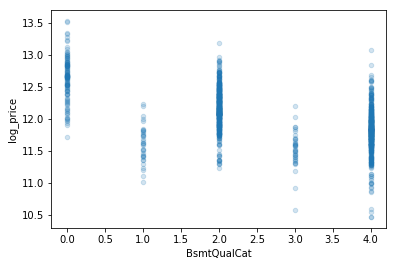

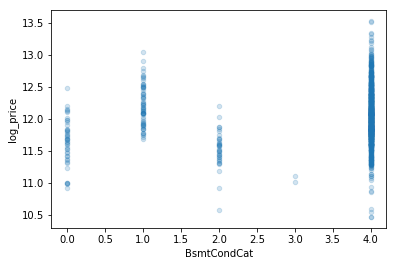

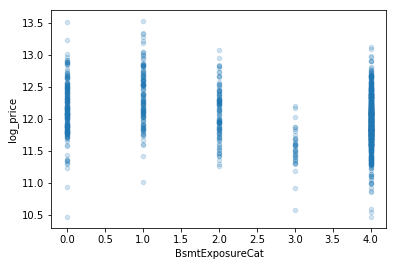

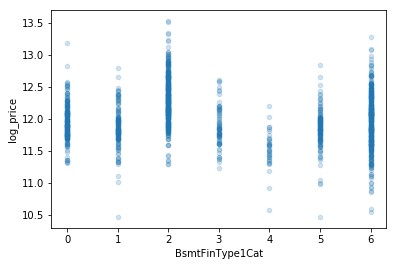

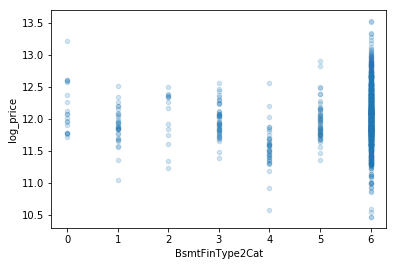

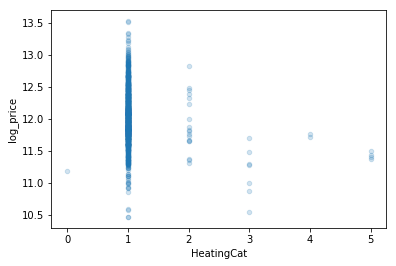

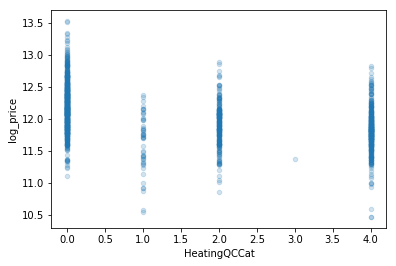

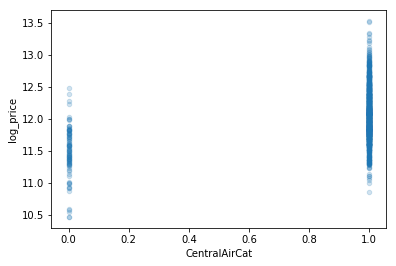

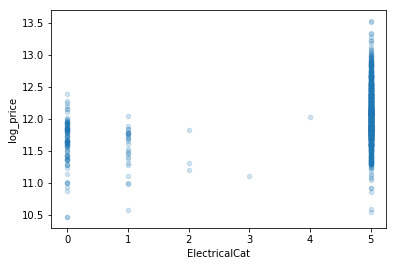

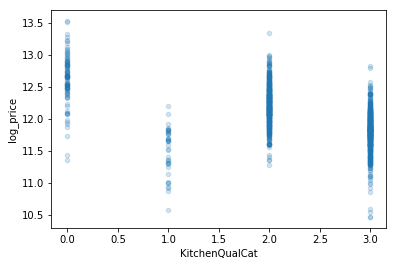

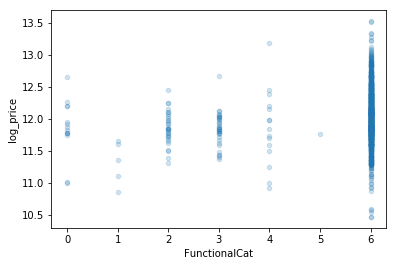

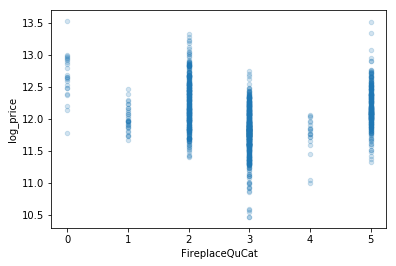

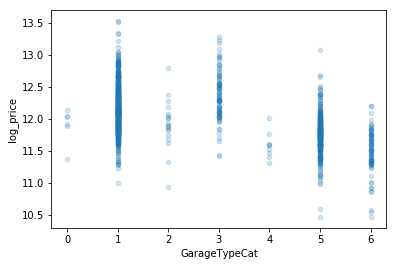

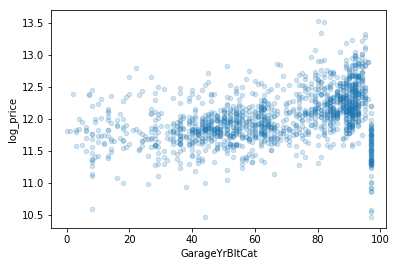

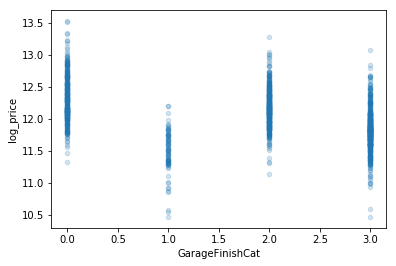

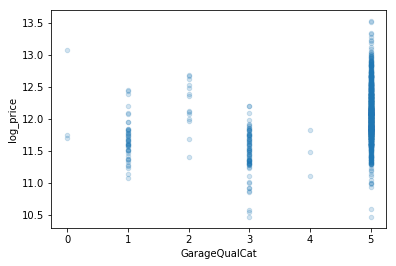

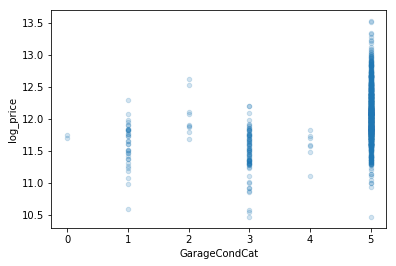

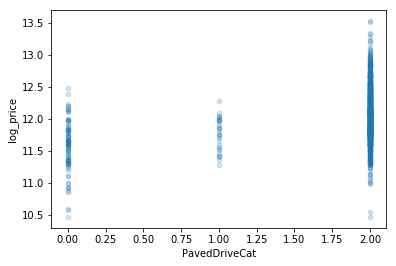

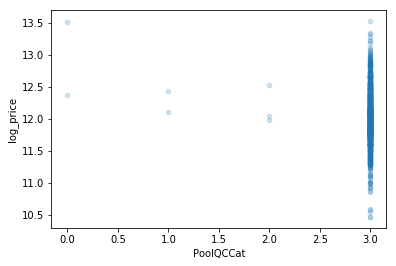

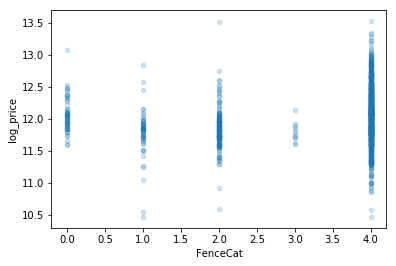

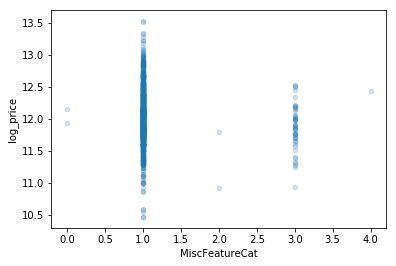

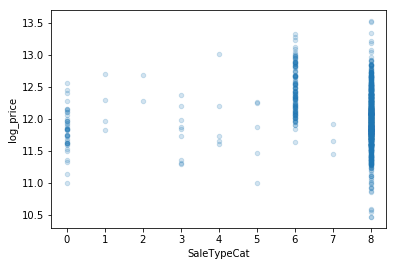

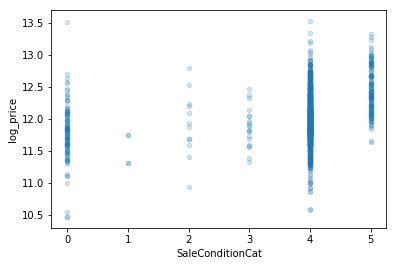

In [50]:
for column in columns:
        num_df.plot.scatter(column,'log_price', alpha =0.2)

### Let's try a Log-Linear Regression!

Kitchen Sink of course!

In [51]:
target = ['log_price']
features = columns

X = num_df[features]
y = num_df[target]

lin_mod(X,y)

Root Mean Squared Error 0.15675734506279734
R^2 Score 0.868322158749
Coeff:  [[-1.03181816e-05 -3.53768398e-04 -1.00912623e-03  1.10966743e-06
   6.74529565e-02  3.87052593e-02  1.42275886e-03  1.00344443e-03
  -1.82407146e-05  5.75283140e-05 -1.41008748e-05  2.51867244e-05
   8.15592759e-05  2.93284816e-05  2.74396733e-05  1.38327431e-04
   6.13822030e-02  1.76107352e-02  2.56117008e-02  1.56522114e-02
   1.49686168e-02 -4.02616415e-02  1.37555081e-02  4.13298228e-02
   6.47540866e-02  2.42847823e-05  1.02872060e-04 -2.90398714e-05
   8.29827923e-05  2.35589295e-04  2.64950233e-04 -9.32002987e-04
   3.16523982e-07  1.03184836e-04 -5.94812617e-03 -2.61300349e-02
   4.30884428e-02  1.89859147e-02 -6.59600741e-03  1.26961692e-02
  -1.75170177e-01 -1.41017975e-03  5.02924534e-02  1.18177338e-03
   1.96348268e-03 -4.41476777e-02 -1.39030966e-02 -3.94982058e-03
   5.49708816e-03  1.85326577e-02 -7.10742056e-03  4.95471911e-03
   4.21144815e-03  2.16950458e-05 -8.65154115e-03  8.23902625e-03

In [55]:
0.15675734506279734*np.mean(num_df['SalePrice'])

28360.726333367104

Looks like I have a slight improvement!

In [56]:
#Post Drop
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
            '1stFlrSF','GrLivArea','BsmtFullBath','FullBath',
            'TotRmsAbvGrd','Fireplaces','GarageCars',
            'GarageArea','OpenPorchSF','NeighborhoodCat',
            'MasVnrAreaCat','BsmtFinType2Cat','CentralAirCat',
            'FunctionalCat','GarageTypeCat']

X = num_df[features]

lin_mod(X,y)

Root Mean Squared Error 0.15669048905821914
R^2 Score 0.8684344543105957
Coeff:  [[-4.08637037e-04  2.01434761e-06  8.29028729e-02  4.19162775e-02
   2.29524112e-03  1.32761507e-03 -4.66292518e-05 -5.74823220e-05
   8.69774825e-05  4.23836482e-05  1.78825904e-04  6.37569495e-02
   8.56834310e-03  1.42257750e-02  5.37823693e-02  7.56239240e-02
   3.31914134e-05 -8.98327293e-06  1.48556353e-03 -3.49854332e-05
   7.57936390e-03  7.13015687e-02  1.78298410e-02 -1.06389518e-02]]


In [57]:
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
            '1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath',
            'BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
            'GarageArea','WoodDeckSF','OpenPorchSF','NeighborhoodCat',
            'MasVnrAreaCat','ExterCondCat','BsmtFinType2Cat','CentralAirCat',
            'FunctionalCat','GarageTypeCat','LotFrontage_2','LotArea_2',
            'YearRemodAdd_2','BsmtFinSF1_2','BsmtUnfSF_2','TotalBsmtSF_2']

X = num_df[features]

lin_mod(X,y)

Root Mean Squared Error 0.14102996551921892
R^2 Score 0.8934190225815731
Coeff:  [[ 1.24542858e-03  5.43500320e-06  7.48512430e-02  4.10930449e-02
   2.53422922e-03 -3.44078350e-01  7.43198646e-05 -7.24607656e-05
   2.52283682e-04  1.00997697e-04  5.06186586e-05  1.93829647e-04
   2.82903982e-02  5.21089086e-04 -6.98717010e-03  6.66409545e-03
   4.54812659e-02  3.48979854e-02  9.33143041e-05  7.61758258e-05
  -7.01266920e-06  7.36239552e-04 -6.28656846e-05  1.08499855e-02
   1.99709333e-03  6.44505697e-02  2.14004576e-02 -4.20757409e-03
  -5.90486075e-06 -2.03981040e-11  8.72886736e-05 -4.03508963e-08
   1.54119699e-08 -6.40226597e-08]]


In [58]:
0.14102996551921892*np.mean(num_df['SalePrice'])

25515.310018120508

Root Mean Squared Error is looking pretty good. 

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data